# tensorflow 教程练习

- 基本流程
    - create tensor (constant,variable,placeholder)
    - write operation
    - init参数
    - 创建session
    - run session 
    


In [1]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(1)

from tf_utils import load_dataset


/Users/pengju/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 最简单损失函数

In [2]:
# create tensor
y_hat=tf.constant(36,name='y_hat')
y=tf.constant(39,name='y')
# write operation
loss=tf.Variable((y-y_hat)**2,name='loss')
# init参数
init=tf.global_variables_initializer()

# 创建session
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(loss))


9


In [3]:
a=tf.constant(2)
b=tf.constant(10)
c=tf.multiply(a,b)
print(c)
with tf.Session() as sess:
    print(sess.run(c))
    
sess=tf.Session()
print(sess.run(c))

Tensor("Mul:0", shape=(), dtype=int32)
20
20


In [4]:
x=tf.placeholder(tf.int64,name='x')
print(sess.run(2*x,feed_dict={x:3}))

6


In [5]:
print(sess.run(2*x,feed_dict={x:3}))

6


### 线性方程

In [6]:
def linear_function():
    np.random.seed(1)
    X=tf.constant(np.random.randn(3,1),name='X')
    W=tf.constant(np.random.randn(4,3),name='W')
    b=tf.constant(np.random.randn(4,1),name='b')    
    Y=tf.add(tf.matmul(W,X),b)
    
    
    init=tf.global_variables_initializer()
    
    sess=tf.Session()
    sess.run(init)
    result=sess.run(Y)
    sess.close()
    return result

In [7]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


###  计算sigmoid


#### 【bug】 `Z=tf.placeholder(tf.int32,name='Z')`应该改为`Z=tf.placeholder(tf.float32,name='Z')`
```
TypeError: Value passed to parameter 'x' has DataType int64 not in list of allowed values: bfloat16, float16, float32, float64, complex64, complex128
```

In [8]:
def sigmoid(z):
    Z=tf.placeholder(tf.float32,name='Z')
    sigmoid=tf.sigmoid(Z,name='sigmoid')
    sess=tf.Session()
    sess.run(tf.global_variables_initializer())
    result=sess.run(sigmoid,feed_dict={Z:z})
    sess.close()
    return result

In [9]:

print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


### 计算损失函数

- 【bug】 `TypeError: Input 'y' of 'Mul' Op has type int64 that does not match type float32 of argument 'x'.`
    - 解决方法：(1)必须先创建 placeholder（2）先建立sess再运行结果

In [10]:
def cost(logit,labels):
    y=tf.placeholder(tf.float32,shape=(None,))
    z=tf.placeholder(tf.float32,shape=(None,))
    cost=tf.nn.sigmoid_cross_entropy_with_logits(logits=y,labels=z)
    sess=tf.Session()
    sess.run(tf.global_variables_initializer())
    result=sess.run(cost,feed_dict={y:logit,z:labels})    
    return result

In [11]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
print(logits)
y=np.array([0,0,1,1])
print(y)
print(cost(logits,y))

[0.54983395 0.59868765 0.66818774 0.7109495 ]
[0 0 1 1]
[1.0053872  1.0366409  0.41385433 0.39956614]


### one-hot编码

- 【bug】解决方案： `y=tf.placeholder(tf.int32,shape=(None,))` 的类型应为 `int`

```
TypeError: Value passed to parameter 'indices' has DataType float32 not in list of allowed values: uint8, int32, int64
```


In [12]:
def one_hot_matrix(labels,C=4):
    y=tf.placeholder(tf.int32,shape=(None,))
    one_hot= tf.one_hot(y,depth=C)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        result=sess.run(one_hot,feed_dict={y:labels})
    return result

In [13]:
labels=np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


### 初始化 ones 和 zeros


In [14]:
def ones(shape):
    one=tf.ones(shape,dtype=tf.float32)
    sess=tf.Session()
    result=sess.run(one)
    sess.close()
    return result



In [15]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


## 2 编写最简单的神经网络

In [78]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(1)

from tf_utils import load_dataset


In [79]:
# load_dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y=5


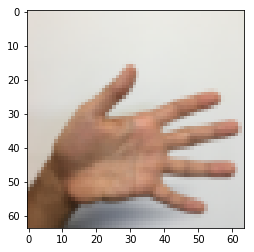

In [80]:
index=0
plt.imshow(X_train_orig[index])
print("y="+str(np.squeeze(Y_train_orig[:,index])))

### convert_to_one_hot one-hot编码 
- `np.eye(C)[Y.reshape(-1)].T`

In [81]:
def convert_to_one_hot(Y,C):
    Y=np.eye(C)[Y.reshape(-1)].T
    return Y

X_train_flatten=X_train_orig.reshape(X_train_orig.shape[0],-1).T
X_test_flatten=X_test_orig.reshape(X_test_orig.shape[0],-1).T

X_train=X_train_flatten/255.
X_test=X_test_flatten/255.

Y_train=convert_to_one_hot(Y_train_orig,6)
Y_test=convert_to_one_hot(Y_test_orig,6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [82]:
def create_placeholders(n_x,n_y):
    X=tf.placeholder(tf.float32, shape=(n_x,None))
    Y=tf.placeholder(tf.float32,shape=(n_y,None))
    return X,Y
        

In [83]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder_2:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_3:0", shape=(6, ?), dtype=float32)


###  初始化参数

- 参数初始化方式 `W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))`
    - 指定 shape/name/init
    
- 【bug】 原因 缺少`tf.reset_default_graph()`

```
ValueError: Variable W1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-22-f6ca679b8598>", line 1, in <module>
    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
  File "/Users/pengju/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/Users/pengju/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
```

In [84]:
def initialize_parameters():
    tf.set_random_seed(1)    
    
    W1=tf.get_variable("W1",shape=[25,12288],initializer=tf.contrib.layers.xavier_initializer())
    b1=tf.get_variable("b1",shape=[25,1],initializer=tf.zeros_initializer())
    W2=tf.get_variable("W2",shape=[12,25],initializer=tf.contrib.layers.xavier_initializer())
    b2=tf.get_variable("b2",shape=[12,1],initializer=tf.zeros_initializer())
    W3=tf.get_variable("W3",shape=[6,12],initializer=tf.contrib.layers.xavier_initializer())
    b3=tf.get_variable("b3",shape=[6,1],initializer=tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters    
    
    
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))    
    
    
    
    
    

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


### 正向传播

- [函数]`tf.nn.relu` relu模块 


In [85]:
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1=tf.add(tf.matmul(W1,X),b1)
    A1=tf.nn.relu(Z1)
    Z2=tf.add(tf.matmul(W2,A1),b2)
    A2=tf.nn.relu(Z2)    
    Z3=tf.add(tf.matmul(W3,A2),b3)
    return Z3
 

In [86]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y=create_placeholders(12288,6)    
    parameters=initialize_parameters()
    Z3=forward_propagation(X,parameters)
    print("Z3="+str(Z3))
    



Z3=Tensor("Add_2:0", shape=(6, ?), dtype=float32)


### 计算损失函数

In [87]:
def compute_cost(Z3,Y):
    logits=tf.transpose(Z3)
    labels=tf.transpose(Y)
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=labels) )
    return cost
    
    
    

In [88]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y=create_placeholders(12288,6)
    parameters=initialize_parameters()
    Z3=forward_propagation(X,parameters)
    cost=compute_cost(Z3,Y)
    print("cost = " + str(cost))    

cost = Tensor("Mean:0", shape=(), dtype=float32)


### 建立模型
- `from tensorflow.python.framework import ops` 

```
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables

```

- 建模要求：非常重要且基础的代码，要熟练掌握

- 怀疑官方代码有错误地方：
    - 【自己理解错误】不需要用`A3`，应该用 `Z3`(激活项用的softmax，`tf.nn.softmax_cross_entropy_with_logits`中已经包含了计算激活项的部分了)

In [89]:
from tensorflow.python.framework import ops

from tf_utils import  random_mini_batches

In [27]:
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.0001,
          num_epoches=1500,minibatch_size=32,print_cost=True
         ):
    #  构建模型
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed=3
    (n_x,m)=X_train.shape
    n_y=Y_train.shape[0]
    costs=[]    
    
    X,Y=create_placeholders(n_x,n_y)
    parameters=initialize_parameters()
    Z3=forward_propagation(X,parameters)
    cost=compute_cost(Z3,Y)
    
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)        
        
        for epoch in range(num_epoches):
            num_minibatches=int(m/minibatch_size)
            epoch_cost=0
            seed=seed+1
            minibatches=random_mini_batches(X_train,Y_train,minibatch_size,seed)
            
            for minibatch in minibatches:
                (minibatch_X,minibatch_Y)=minibatch
                _,minibatch_cost=sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
                epoch_cost += minibatch_cost / num_minibatches
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

            # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))

        return parameters

Cost after epoch 0: 1.971634
Cost after epoch 100: 1.691329
Cost after epoch 200: 1.544335
Cost after epoch 300: 1.401648
Cost after epoch 400: 1.272255
Cost after epoch 500: 1.154761
Cost after epoch 600: 1.050583
Cost after epoch 700: 0.964430
Cost after epoch 800: 0.889303
Cost after epoch 900: 0.823211
Cost after epoch 1000: 0.769614
Cost after epoch 1100: 0.712559
Cost after epoch 1200: 0.666590
Cost after epoch 1300: 0.624639
Cost after epoch 1400: 0.586246


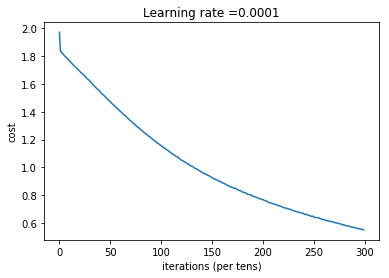

Parameters have been trained!
Train Accuracy: 0.8648148
Test Accuracy: 0.75


In [28]:
parameters = model(X_train, Y_train, X_test, Y_test)

#### 【bug】原因分析： `cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z3,labels=Y))`中输入`logits`有误，应该为`Z3`而不是`Z2`
```
ValueError: Dimensions must be equal, but are 12 and 6 for 'softmax_cross_entropy_with_logits' (op: 'SoftmaxCrossEntropyWithLogits') with input shapes: [12,?], [6,?].

```

#### 【bug】`minibatch_x,minibatch_y=minibatches`应该为`minibatch_x,minibatch_y=minibatch`
```
ValueError                                Traceback (most recent call last)
<ipython-input-41-deb2e85c78a6> in <module>()
----> 1 parameters = my_model(X_train, Y_train, X_test, Y_test,num_epoches=3)

<ipython-input-40-63346c20483e> in my_model(X_train, Y_train, X_test, Y_test, learning_rate, num_epoches, minibatch_size, print_cost)
     48             minibatches=random_mini_batches(X_train,Y_train,minibatch_size,seed)
     49             for minibatch in minibatches:
---> 50                 minibatch_x,minibatch_y=minibatches
     51                 _,c=sess.run([optimizer,cost],feed_dict={X:minibatch_x,Y:minibatch_y})
     52                 epoch_cost=c/num_batches

ValueError: too many values to unpack (expected 2)

```

#### 【bug】损失函数没有下降，反而上升 

- 验证无关因素项目- 减小学习率、延长训练epoch
- 发现错误，但不是主要原因  `epoch_cost+=c/num_batches` 写成了 `epoch_cost=c/num_batches`
- 计算cost时 `    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z3,labels=Y))`，没有考虑 `logits=tf.transpose(Z3)  labels=tf.transpose(Y)` ；提醒：softmax输入类型的shape应该是m,n_y
    
```
cost after epoch0:0.38988162531997217
cost after epoch1:0.4135151198416045
cost after epoch2:0.6912322188868667
cost after epoch3:13.104271166252367
cost after epoch4:nan
```

#### 【bug】原因不详，但是将`from tensorflow.python.framework import ops`移到函数体外部就没有问题了
```
---------------------------------------------------------------------------
AssertionError                            Traceback (most recent call last)
<ipython-input-29-9d9aceb43834> in <module>()
----> 1 parameters = my_model(X_train, Y_train, X_test, Y_test,num_epoches=1)

<ipython-input-27-26a4e3c61e08> in my_model(X_train, Y_train, X_test, Y_test, learning_rate, num_epoches, minibatch_size, print_cost)
      4     from tensorflow.python.framework import ops
      5     from tf_utils import  random_mini_batches
----> 6     ops.reset_default_graph()
      7     tf.set_random_seed(1)
      8     seed=3

~/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py in reset_default_graph()
   5534   """
   5535   if not _default_graph_stack.is_cleared():
-> 5536     raise AssertionError("Do not use tf.reset_default_graph() to clear "
   5537                          "nested graphs. If you need a cleared graph, "
   5538                          "exit the nesting and create a new graph.")

AssertionError: Do not use tf.reset_default_graph() to clear nested graphs. If you need a cleared graph, exit the nesting and create a new graph.
```


In [99]:
from tensorflow.python.framework import ops
from tf_utils import  random_mini_batches        
    
def my_model(X_train,Y_train,X_test,Y_test,learning_rate=0.00001,
            num_epoches=15,minibatch_size=32,print_cost=True):
    #  reset graph


    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed=3
    (n_x,m)=X_train.shape
    n_y=Y_train.shape[0]    
    costs=[]
    
    


    #  绘制graph    (输入 X Y用 placeholder)
    X=tf.placeholder(tf.float32,shape=(n_x,None))
    Y=tf.placeholder(tf.float32,shape=(n_y,None))
    
    #     W,b 用get_variable，并且 initializer 
    # W xavier_initializer 初始化 
    # b zeros_initializer 初始化
    # W3 b3的shape[0]应该与n_y一致，因为后续要计算softamx激活值     
    
    W1=tf.get_variable("W1",shape=(25,n_x),initializer=tf.contrib.layers.xavier_initializer())
    b1=tf.get_variable("b1",shape=(25,1),initializer=tf.zeros_initializer())
    W2=tf.get_variable("W2",shape=(12,25),initializer=tf.contrib.layers.xavier_initializer())
    b2=tf.get_variable("b2",shape=(12,1),initializer=tf.zeros_initializer())
    W3=tf.get_variable("W3",shape=(6,12),initializer=tf.contrib.layers.xavier_initializer())
    b3=tf.get_variable("b3",shape=(6,1),initializer=tf.zeros_initializer())
    
    Z1=tf.add(tf.matmul(W1,X),b1)
    A1=tf.nn.relu(Z1)
    Z2=tf.add(tf.matmul(W2,A1),b2)
    A2=tf.nn.relu(Z2)
    Z3=tf.add(tf.matmul(W3,A2),b3)
    
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.transpose(Z3),labels=tf.transpose(Y)))
    optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    
    init=tf.global_variables_initializer()
    
    with tf.Session() as sess:
        costs=[]
        sess.run(init)

        num_minibatches=int(m/minibatch_size)
        seed=seed+1
        
        for epoch in range(num_epoches):
            epoch_cost=0
            minibatches=random_mini_batches(X_train,Y_train,minibatch_size,seed)
            for minibatch in minibatches:
                minibatch_x,minibatch_y=minibatch            
                _,minibatch_cost=sess.run([optimizer,cost],feed_dict={X:minibatch_x,Y:minibatch_y})
                epoch_cost+=minibatch_cost/num_minibatches
            if print_cost==True and epoch%100==0:
                print("cost after epoch{}:{}".format(epoch,epoch_cost))
            if print_cost==True and epoch%100==0:                
                costs.append(epoch_cost)
                
            
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        
        
        correct_prediction=tf.equal(tf.argmax(Z3),tf.argmax(Y))
        print(correct_prediction)
        accuracy=tf.reduce_mean(tf.cast(correct_prediction,'float'))
        
        print("train 准确率={:,.2%}".format(accuracy.eval({X:X_train,Y:Y_train})))
        print("test 准确率={:,.2%}".format(accuracy.eval({X:X_test,Y:Y_test})))        
        
        
        
        
        
        
        
            
                
            
                
            

        
        

cost after epoch0:1.9349389870961506
cost after epoch1:1.840100888049964
cost after epoch2:1.8345963449189155
cost after epoch3:1.8309284990484065
cost after epoch4:1.8257485230763755
cost after epoch5:1.8215428879766755
cost after epoch6:1.817333629637053
cost after epoch7:1.8134515357739993
cost after epoch8:1.8088690548232111
cost after epoch9:1.8034490672024812
cost after epoch10:1.795001304510868
cost after epoch11:1.7876318620912959
cost after epoch12:1.7772448243516863
cost after epoch13:1.7677691018942632
cost after epoch14:1.7587682153239388
cost after epoch15:1.750883207176671
cost after epoch16:1.7419502121029478
cost after epoch17:1.7339956290794138
cost after epoch18:1.7268142519575174
cost after epoch19:1.7199868252783108
cost after epoch20:1.7131895621617634
cost after epoch21:1.706694021369472
cost after epoch22:1.7001299641349097
cost after epoch23:1.6938462943741772
cost after epoch24:1.687924446481647
cost after epoch25:1.681869373177037
cost after epoch26:1.67665169

cost after epoch216:1.1518322247447392
cost after epoch217:1.1499233029105447
cost after epoch218:1.1481996034130904
cost after epoch219:1.146346845410087
cost after epoch220:1.1447010076407231
cost after epoch221:1.1429707118959136
cost after epoch222:1.141253447893894
cost after epoch223:1.1395023320660447
cost after epoch224:1.1377461317813762
cost after epoch225:1.1360330455230943
cost after epoch226:1.134326327930797
cost after epoch227:1.1326680725271054
cost after epoch228:1.1308617555733882
cost after epoch229:1.1291828570943891
cost after epoch230:1.1275727423754605
cost after epoch231:1.1258436513669563
cost after epoch232:1.124172781452988
cost after epoch233:1.1224522915753448
cost after epoch234:1.1206603682402405
cost after epoch235:1.1189850370089214
cost after epoch236:1.1172729658358027
cost after epoch237:1.1155743039015564
cost after epoch238:1.1139294071630996
cost after epoch239:1.1121905084812278
cost after epoch240:1.1104671250690112
cost after epoch241:1.1087863

cost after epoch428:0.8579176664352419
cost after epoch429:0.8569063724893512
cost after epoch430:0.8559057694492919
cost after epoch431:0.8548948421622768
cost after epoch432:0.8538866205648941
cost after epoch433:0.8528341072978393
cost after epoch434:0.851792461944349
cost after epoch435:0.8507448380643672
cost after epoch436:0.8496834942788789
cost after epoch437:0.8486323176008281
cost after epoch438:0.8476115862528484
cost after epoch439:0.8465794794487231
cost after epoch440:0.8455090306021952
cost after epoch441:0.8444816000533826
cost after epoch442:0.8435039159023401
cost after epoch443:0.8425705198085669
cost after epoch444:0.8415648846915272
cost after epoch445:0.8405417565143467
cost after epoch446:0.8395195639494695
cost after epoch447:0.8385806932593837
cost after epoch448:0.8375213778380193
cost after epoch449:0.8365686915137551
cost after epoch450:0.8356294668082036
cost after epoch451:0.8345846353155195
cost after epoch452:0.8334680578925392
cost after epoch453:0.8324

cost after epoch639:0.6780073191180374
cost after epoch640:0.6772873022339562
cost after epoch641:0.6766454414887864
cost after epoch642:0.675906706940044
cost after epoch643:0.6751881341139476
cost after epoch644:0.6745558615886804
cost after epoch645:0.6739008399573241
cost after epoch646:0.6731640732649601
cost after epoch647:0.6724290947119396
cost after epoch648:0.6717811642271099
cost after epoch649:0.6711888638409701
cost after epoch650:0.6704788352503921
cost after epoch651:0.6698153416315715
cost after epoch652:0.6691002303903754
cost after epoch653:0.6684848313981835
cost after epoch654:0.6677296260992687
cost after epoch655:0.6671029771819257
cost after epoch656:0.6664552995652864
cost after epoch657:0.665650963783264
cost after epoch658:0.6649127250367944
cost after epoch659:0.664044939207308
cost after epoch660:0.6632307822054084
cost after epoch661:0.6624690565195951
cost after epoch662:0.6617998625292921
cost after epoch663:0.6610562891671151
cost after epoch664:0.660261

cost after epoch850:0.5335302145192117
cost after epoch851:0.5329911880420916
cost after epoch852:0.532493975126382
cost after epoch853:0.5319913643779177
cost after epoch854:0.5314132011297977
cost after epoch855:0.5309171703728762
cost after epoch856:0.5305844680829481
cost after epoch857:0.5300273561116421
cost after epoch858:0.529372476267092
cost after epoch859:0.5288611803994033
cost after epoch860:0.5283726968548514
cost after epoch861:0.5278267282428163
cost after epoch862:0.527125774007855
cost after epoch863:0.5267232439734719
cost after epoch864:0.5261736087726826
cost after epoch865:0.5256041306437869
cost after epoch866:0.525117388277343
cost after epoch867:0.524552170977448
cost after epoch868:0.524044161493128
cost after epoch869:0.5236028992768491
cost after epoch870:0.523040209755753
cost after epoch871:0.5225209322842685
cost after epoch872:0.5220112096179615
cost after epoch873:0.5214952248515504
cost after epoch874:0.5210050308343136
cost after epoch875:0.5205257742

cost after epoch1059:0.4397808394648812
cost after epoch1060:0.43954078266114893
cost after epoch1061:0.438973931652127
cost after epoch1062:0.4387361000884663
cost after epoch1063:0.4383560635826805
cost after epoch1064:0.43793570363160345
cost after epoch1065:0.43738375920237915
cost after epoch1066:0.4371245106061299
cost after epoch1067:0.43659850955009466
cost after epoch1068:0.43634851141409436
cost after epoch1069:0.43597072995070263
cost after epoch1070:0.4354285272684964
cost after epoch1071:0.4351688370560155
cost after epoch1072:0.4346473379568621
cost after epoch1073:0.4344177209969722
cost after epoch1074:0.43388185130827356
cost after epoch1075:0.43364978288159234
cost after epoch1076:0.4331083388039559
cost after epoch1077:0.4328799739931569
cost after epoch1078:0.43233836284189514
cost after epoch1079:0.4321162664529049
cost after epoch1080:0.4317392363692776
cost after epoch1081:0.43135878488873
cost after epoch1082:0.43080465224656184
cost after epoch1083:0.4306236239

cost after epoch1262:0.367797038320339
cost after epoch1263:0.36750657766154315
cost after epoch1264:0.36707215959375555
cost after epoch1265:0.36673251697511383
cost after epoch1266:0.3665542602539062
cost after epoch1267:0.36623638597401714
cost after epoch1268:0.3659120716831901
cost after epoch1269:0.3656214141484463
cost after epoch1270:0.36526728489182214
cost after epoch1271:0.36500835779941443
cost after epoch1272:0.36454769607746224
cost after epoch1273:0.36431462475747767
cost after epoch1274:0.36393478512763977
cost after epoch1275:0.36372950176397956
cost after epoch1276:0.36341949033014703
cost after epoch1277:0.3631272117296856
cost after epoch1278:0.3628069482969515
cost after epoch1279:0.36249829106258624
cost after epoch1280:0.3621841203985793
cost after epoch1281:0.361790046095848
cost after epoch1282:0.36157323465202795
cost after epoch1283:0.3610836624196081
cost after epoch1284:0.3608063486489383
cost after epoch1285:0.36049068651416094
cost after epoch1286:0.36015

cost after epoch1467:0.3090946304075646
cost after epoch1468:0.30868895803437085
cost after epoch1469:0.30861830350124475
cost after epoch1470:0.3083451981797363
cost after epoch1471:0.3080369631449381
cost after epoch1472:0.3077985983003269
cost after epoch1473:0.3074049773541364
cost after epoch1474:0.30733807204347663
cost after epoch1475:0.30692144280130207
cost after epoch1476:0.30669745983499475
cost after epoch1477:0.3063463279695221
cost after epoch1478:0.3062928278337826
cost after epoch1479:0.3058653135191311
cost after epoch1480:0.3057359140930753
cost after epoch1481:0.3053309054988803
cost after epoch1482:0.3052394931966608
cost after epoch1483:0.3048887103796006
cost after epoch1484:0.30473241435758996
cost after epoch1485:0.30431841358993983
cost after epoch1486:0.30422795134963404
cost after epoch1487:0.303883662278002
cost after epoch1488:0.30370566474668903
cost after epoch1489:0.3034550172813011
cost after epoch1490:0.30318773470141674
cost after epoch1491:0.30303771

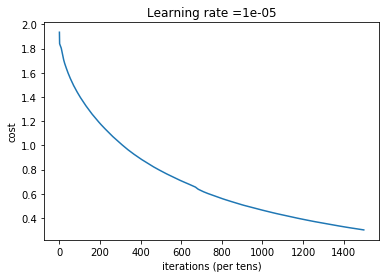

Tensor("Equal:0", shape=(?,), dtype=bool)
train 准确率=92.96%
test 准确率=78.33%


In [100]:
parameters = my_model(X_train, Y_train, X_test, Y_test,num_epoches=1500)